In [1]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('order_items.csv', 'order_items'),
    ('payments.csv', 'payments'),
      ('geolocation.csv', 'geolocation')# Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Aditya05@',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/adity/OneDrive/Desktop/E-commerce Project Data Analyst/resources'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector 


db = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Aditya05@',
    database='ecommerce'
)
cursor = db.cursor()



# List all unique cities where customers are located.

In [4]:
query1 = """select distinct customer_city from customers"""

cursor.execute(query1)

data = cursor.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# Count the number of orders placed in 2017.

In [6]:
query2 = """select count(order_id) from orders 
where year(order_purchase_timestamp) = 2017;
"""
cursor.execute(query2)
data = cursor.fetchall()
data[0][0]

180404

# Find he total sales per category.

In [8]:
query = """select products.product_category category , sum(payments.payment_value)
from products 
join order_items 
on products.product_id = order_items.product_id
join payments 
on payments.order_id=order_items.order_id
group by category
"""
cursor.execute(query)
data = cursor.fetchall()
data


[('perfumery', 6080863.918729126),
 ('Furniture Decoration', 17162116.70131939),
 ('telephony', 5842584.608551495),
 ('bed table bath', 20550644.05203923),
 ('automotive', 10227531.973503113),
 ('computer accessories', 19023965.355099477),
 ('housewares', 13137097.563406639),
 ('babies', 6478147.916820288),
 ('toys', 7428452.273752682),
 ('Furniture office', 7761917.84578228),
 ('Cool Stuff', 9356376.000584185),
 ('HEALTH BEAUTY', 19888477.432722665),
 ('pet Shop', 3735227.643617034),
 ('General Interest Books', 776337.1153850555),
 ('stationary store', 3809280.835905075),
 ('Watches present', 17150600.1431095),
 ('PCs', 3349458.592391968),
 ('climatization', 1094047.9138412476),
 ('Construction Tools Construction', 2897707.563105583),
 ('sport leisure', 16705530.709794268),
 ('Bags Accessories', 2245815.484620452),
 ('electronics', 3118285.196089603),
 ('Casa Construcao', 1639743.4836784601),
 ('Games consoles', 2345764.54950428),
 ('Fashion Bags and Accessories', 2617899.360265732),


# Calculate the percentage of orders that were paid in installments.

In [10]:
query = """select (sum(case when payment_installments >=1 then 1
else 0 end))/count(*) *100
from payments
"""
cursor.execute(query)
data = cursor.fetchall()
data

[(Decimal('99.9981'),)]

# Count the number of customers from each state. 

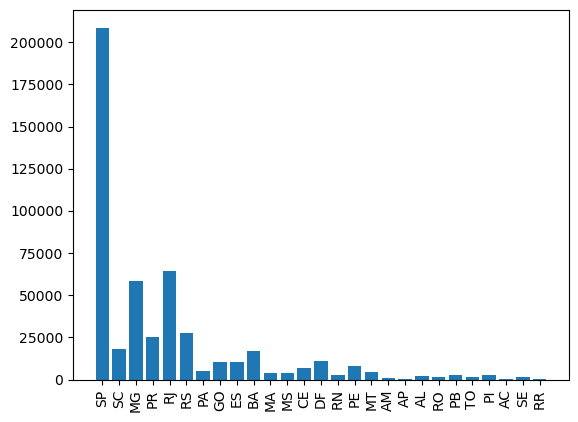

In [12]:
query2 = """select customer_state, count(customer_id) from customers
group by customer_state;
"""
cursor.execute(query2)
data = cursor.fetchall()

df = pd.DataFrame(data,columns = ['state','total_customer'])
df.sort_values(by = "total_customer", ascending= False)
plt.bar(df['state'],df['total_customer'])
plt.xticks(rotation =90)
plt.show()

# Calculate the number of orders per month in 2018.

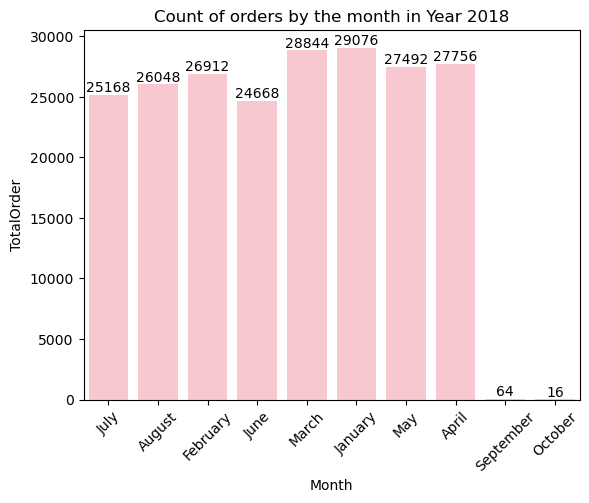

In [14]:
query2 = """select monthname(order_purchase_timestamp) month, count(order_id) 
from orders
where year(order_purchase_timestamp) = 2018
group by monthname(order_purchase_timestamp);
"""
cursor.execute(query2)
data = cursor.fetchall()
df = pd.DataFrame(data,columns = ['Month','TotalOrder'])
ax=sns.barplot(x=df['Month'],y=df['TotalOrder'],color='pink')
plt.xticks(rotation=45)
plt.bar_label(ax.containers[0])
plt.title("Count of orders by the month in Year 2018")

plt.show()


# Find the average number of products per order, grouped by customer city.

In [16]:
query = """with count_per_order AS (select orders.order_id ,orders.customer_id , count(order_items.order_id) oc
from orders
join order_items on orders.order_id = order_items.order_id
group by orders.order_id ,orders.customer_id)

select customers.customer_city , Round(AVG(count_per_order.oc),2) Average_orders
from customers 
join count_per_order on customers.customer_id = count_per_order.customer_id
group by customers.customer_city
order by Average_orders;
"""
cursor.execute(query)
data = cursor.fetchall()
df= pd.DataFrame(data,columns = ['City', 'Average_Orders'])
df

,City,Average_Orders
0,fortim,8.00
1,cairu,8.00
2,epitaciolandia,8.00
3,urucania,8.00
4,brotas de macaubas,8.00
...,...,...
4105,matias olimpio,40.00
4106,candido godoi,48.00
4107,datas,48.00
4108,celso ramos,52.00


# Calculate the percentage of total revenue contributed by each product category.

In [18]:
query = """select products.product_category category , round((sum(payments.payment_value)/(select sum(payment_value) from payments)) *100,2) as sales
from products 
join order_items 
on products.product_id = order_items.product_id
join payments 
on payments.order_id=order_items.order_id
group by category
order by sales desc;
"""
cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data , columns = ['Product_Category', 'Percentage_distribution' ])
df


,Product_Category,Percentage_distribution
0,bed table bath,64.19
1,HEALTH BEAUTY,62.12
2,computer accessories,59.42
3,Furniture Decoration,53.60
4,Watches present,53.57
...,...,...
69,PC Gamer,0.08
70,House Comfort 2,0.06
71,cds music dvds,0.04
72,Fashion Children's Clothing,0.03


# Identify the correlation between product price and the number of times a product has been purchased.

In [20]:
query = """select products.product_category Category ,
count(order_items.product_id) Orders 
,ROUND(AVG(order_items.price),2) as Price
from products join order_items
on products.product_id=order_items.product_id
group by products.product_category;
"""
cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data,columns=['Category','Orders','Price'])
df
import numpy as np
arr1= df['Orders']
arr2=df['Price']
a=np.corrcoef([arr1,arr2])
print("Correlation between the price and the number of times a product purchase is ", a[0][1])

Correlation between the price and the number of times a product purchase is  -0.10631514167157569


# Calculate the total revenue generated by each seller, and rank them by revenue.

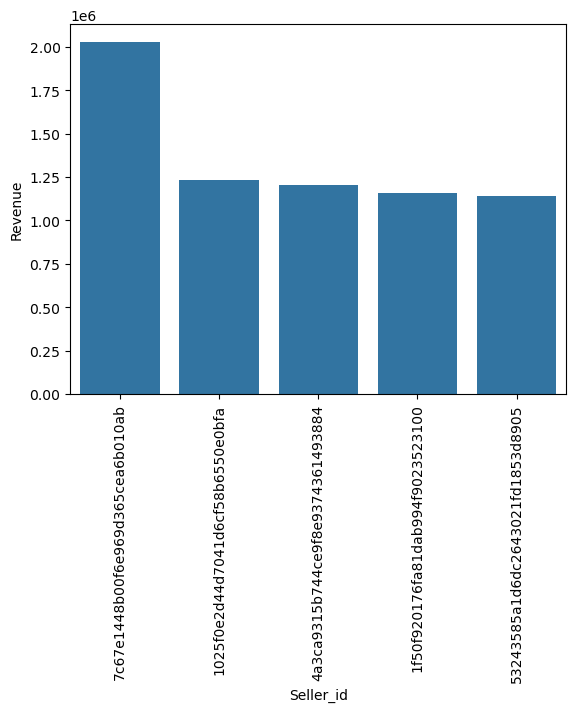

In [22]:
query = """select * , dense_rank() over(order by revenue desc) AS _Rank
 from (select order_items.seller_id,round(sum(payments.payment_value),2) as revenue
from order_items join payments
on order_items.order_id=payments.order_id
group by order_items.seller_id) as a;

"""
cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data,columns=['Seller_id','Revenue','Rank'])
df=df.head()
sns.barplot(x="Seller_id",y="Revenue",data= df)

plt.xticks(rotation=90)
plt.show()

# Calculate the moving average of order values for each customer over their order history.

In [24]:
query = """select customer_id, order_purchase_timestamp, payment,
avg( payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp, 
payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a

"""
cursor.execute(query)
data = cursor.fetchall()
df= pd.DataFrame(data)
df

,0,1,2,3
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
4,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
...,...,...,...,...
831083,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
831084,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
831085,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
831086,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001


# Calculate the cumulative sales per month for each year.

In [26]:
query = """select years,months,payment, sum(payment) over(order by years , months)
from
(select year(orders.order_purchase_timestamp) as years ,month(orders.order_purchase_timestamp) as months , round(sum(payments.payment_value),2) as payment
from orders join payments on orders.order_id = payments.order_id
group by years , months
order by years , months) as a;
"""
cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data)
df

,0,1,2,3
0,2016,9,2017.92,2.017920e+03
1,2016,10,472723.84,4.747418e+05
2,2016,12,156.96,4.748987e+05
3,2017,1,1107904.32,1.582803e+06
4,2017,2,2335264.08,3.918067e+06
5,2017,3,3598908.80,7.516976e+06
6,2017,4,3342304.24,1.085928e+07
7,2017,5,4743350.56,1.560263e+07
8,2017,6,4090211.04,1.969284e+07
9,2017,7,4739063.36,2.443191e+07


# Calculate the year-over-year growth rate of total sales.

In [29]:
 query = """with a as(select year(orders.order_purchase_timestamp) as years , round(sum(payments.payment_value),2) as payment
from orders join payments on orders.order_id = payments.order_id
group by years
order by years)

select years , round((payment - lag(payment,1) over(order by  years))/lag(payment,1) over(order by  years)*100,2)  from a
"""
cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data,columns=['Year','YOY % growth'])
df

,Year,YOY % growth
0,2016,NaN
1,2017,12112.7
2,2018,20.0


# Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [44]:
query = """with a as (select customers.customer_id , min(orders.order_purchase_timestamp) first_order
from customers join orders on customers.customer_id=orders.customer_id
group by customers.customer_id),

b as (select a.customer_id , count(distinct orders.order_purchase_timestamp)
from a join orders
on a.customer_id = orders.customer_id 
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < date_add(first_order,interval 6 month)
group by orders.customer_id)
select 100*(count(distinct a.customer_id)/count(distinct b.customer_id))
from a left join b
on a.customer_id=b.customer_id;

"""
cursor.execute(query)
data = cursor.fetchall()
data

[(None,)]

# Identify the top 3 customers who spent the most money in each year.

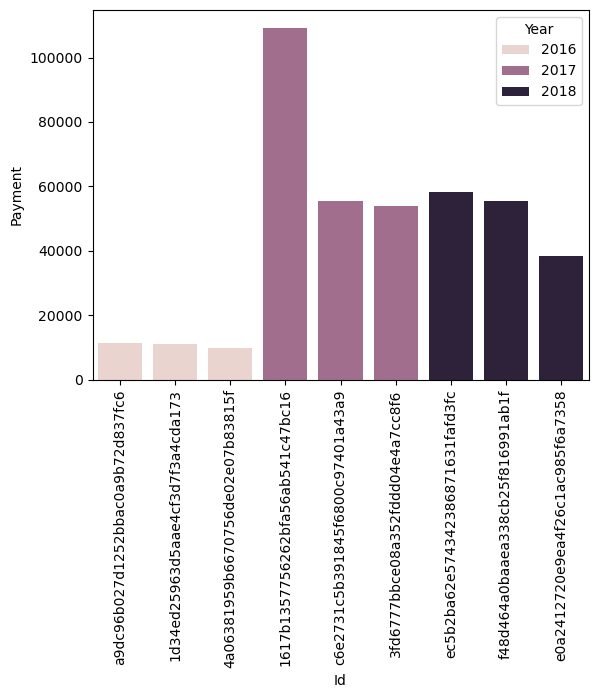

In [59]:
query="""select years, id ,payment,d_rank
from (select year(orders.order_purchase_timestamp) years , orders.customer_id id, sum(payments.payment_value) payment , 
dense_rank()  over(partition by  year(orders.order_purchase_timestamp) order by sum(payments.payment_value) desc ) d_rank
from orders join payments on orders.order_id= payments.order_id
group by years , orders.customer_id ) a 
where d_rank <=3;
"""

cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data, columns= ['Year','Id','Payment','Rank'])
df
sns.barplot(data=df,x='Id',y='Payment',hue='Year')
plt.xticks(rotation=90)
plt.show()